In [1]:
verbose = False

In [2]:
import time # std module
import matplotlib.pyplot as plt
import numpy as np 
from scipy import signal, stats, optimize, interpolate
from numpy.typing import NDArray
import ipywidgets as widgets
import pandas as pd

# Estimating error
Measure variation over time in the reading at a fixed position, for different average intensities (intensity is varied by changing position along interference pattern)

In [3]:
error = pd.read_excel("error_intensity.xlsx")
error.columns

Index(['Time (s) Run #1', 'Position (mm) Run #1', 'Light Intensity (%) Run #1',
       'Time (s) Run #2', 'Position (mm) Run #2', 'Light Intensity (%) Run #2',
       'Time (s) Run #3', 'Position (mm) Run #3', 'Light Intensity (%) Run #3',
       'Time (s) Run #4', 'Position (mm) Run #4', 'Light Intensity (%) Run #4',
       'Time (s) Run #5', 'Position (mm) Run #5', 'Light Intensity (%) Run #5',
       'Time (s) Run #6', 'Position (mm) Run #6', 'Light Intensity (%) Run #6',
       'Time (s) Run #7', 'Position (mm) Run #7', 'Light Intensity (%) Run #7',
       'Time (s) Run #8', 'Position (mm) Run #8', 'Light Intensity (%) Run #8',
       'Time (s) Run #9', 'Position (mm) Run #9', 'Light Intensity (%) Run #9',
       'Time (s) Run #10', 'Position (mm) Run #10',
       'Light Intensity (%) Run #10', 'Time (s) Run #11',
       'Position (mm) Run #11', 'Light Intensity (%) Run #11'],
      dtype='object')

average:  23.0181512605042 std:  0.5211557395360357
average:  0.5999999999999999 std:  1.1102230246251565e-16
average:  5.303690036900369 std:  0.1548277219365849
average:  19.936241610738254 std:  0.4767359328579528
average:  13.185102420856612 std:  0.3964009861714712
average:  19.271345029239768 std:  0.47467804196942065
average:  17.176337115072936 std:  0.47226912135166843
average:  1.2697142857142856 std:  0.04594939541251347
average:  3.9139455782312917 std:  0.1386625023403151
average:  12.544736842105262 std:  0.41019723652553486


Text(0, 0.5, 'Intensity (a.u.)')

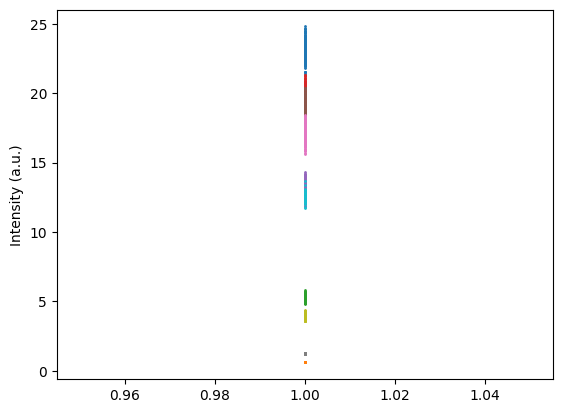

In [4]:
list_av = []
list_std = []

for i in range(1, 11):
    np_err = error[f'Light Intensity (%) Run #{i}'].to_numpy()
    np_err = np_err[~np.isnan(np_err)]
    plt.scatter(np.ones(np_err.shape)*1, np_err, s=1)
    list_av.append(np.average(np_err))
    list_std.append(np.std(np_err))
    print("average: ", list_av[-1], "std: ", list_std[-1])

plt.ylabel('Intensity (a.u.)')

Text(0.5, 1.0, 'Standard Deviation in Intensity (a.u.) vs Average Intensity (a.u.)')

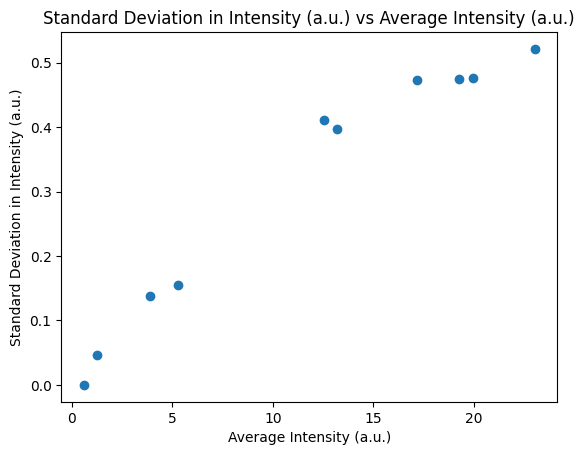

In [5]:
plt.scatter(list_av, list_std)
plt.ylabel('Standard Deviation in Intensity (a.u.)')
plt.xlabel('Average Intensity (a.u.)')
plt.title('Standard Deviation in Intensity (a.u.) vs Average Intensity (a.u.)')

(array([ 4.,  6., 19., 17., 56., 50., 86., 43., 60., 39., 34., 10., 14.,
         4.,  5.]),
 array([18.7       , 18.87333333, 19.04666667, 19.22      , 19.39333333,
        19.56666667, 19.74      , 19.91333333, 20.08666667, 20.26      ,
        20.43333333, 20.60666667, 20.78      , 20.95333333, 21.12666667,
        21.3       ]),
 <BarContainer object of 15 artists>)

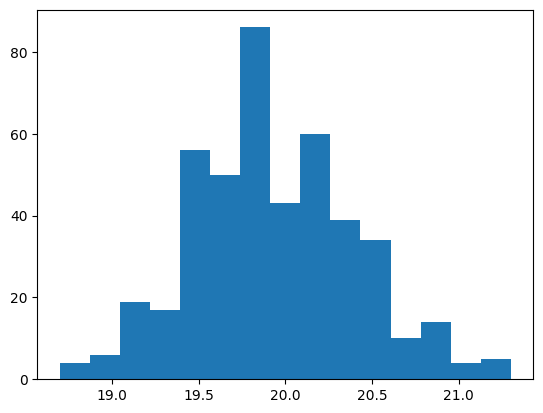

In [6]:
np_err = error['Light Intensity (%) Run #4'].to_numpy()
np_err = np_err[~np.isnan(np_err)]
plt.hist(np_err, bins = 15)

# Fitting experimental data with theory

units:
slit_width (m)
wavelength (m)
position(cm)
displace(cm)
distance(cm)

Curve fitting is done either manually (at first using IpyWidgets, then hardcoding the parameters), or using Scipy Curve Fit. 

# Part 1: 0.04mm

In [7]:
task1a = pd.read_excel("E4part1_4mm.xlsx")
task1a.columns

Index(['Time (s) Run #1', 'Position (mm) Run #1', 'Light Intensity (%) Run #1',
       'Time (s) Run #2', 'Position (mm) Run #2', 'Light Intensity (%) Run #2',
       'Time (s) Run #3', 'Position (mm) Run #3', 'Light Intensity (%) Run #3',
       'Time (s) Run #4', 'Position (mm) Run #4', 'Light Intensity (%) Run #4',
       'Time (s) Run #5', 'Position (mm) Run #5',
       'Light Intensity (%) Run #5'],
      dtype='object')

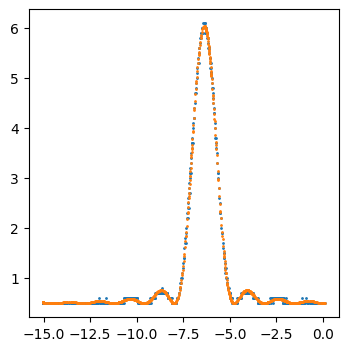

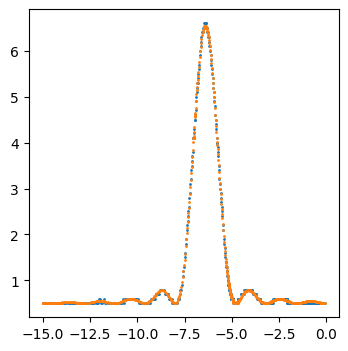

/tmp/ipykernel_3715/2746300706.py:6: RuntimeWarning: invalid value encountered in divide
  return I_0 * (np.sin(beta)/beta)**2 + 0.5
/tmp/ipykernel_3715/2746300706.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  coeff, cov = optimize.curve_fit(curve, position, intensity, p0 = [5.6,-6.4,100])


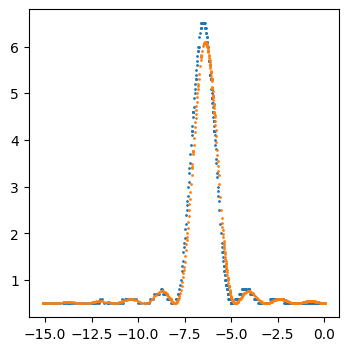

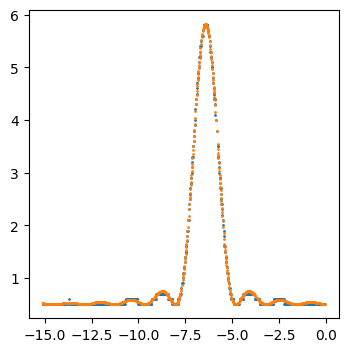

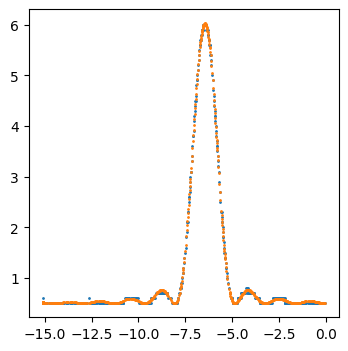

distance based on curve fit [99.08164920428212, 98.65036439710651, 100.0, 99.34076157022363, 98.95873910981408]


In [8]:
slit_width = 0.04E-3
wavelength = 650E-9

def curve(position, I_0, displace, distance):
    beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
    return I_0 * (np.sin(beta)/beta)**2 + 0.5


distance_list = []

for i in range(1,6):
    position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
    position = position[~np.isnan(position)]/10
    intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
    intensity = intensity[~np.isnan(intensity)]
    
    coeff, cov = optimize.curve_fit(curve, position, intensity, p0 = [5.6,-6.4,100])
    distance_list.append(coeff[2])
    
    plt.figure(figsize=(4,4))
    plt.scatter(position, intensity, s=1)
    plt.scatter(position, curve(position, coeff[0], coeff[1], coeff[2]),s=1)

    plt.show()
    
    if verbose:      
        print(i, x,y)
        print(intensity[300:350])

print("distance based on curve fit", distance_list)

# E4part2: 0.08mm

In [9]:
task1a = pd.read_excel("E4part2.xlsx")
task1a.columns

Index(['Time (s) Run #1', 'Position (mm) Run #1', 'Light Intensity (%) Run #1',
       'Time (s) Run #2', 'Position (mm) Run #2', 'Light Intensity (%) Run #2',
       'Time (s) Run #3', 'Position (mm) Run #3', 'Light Intensity (%) Run #3',
       'Time (s) Run #4', 'Position (mm) Run #4', 'Light Intensity (%) Run #4',
       'Time (s) Run #5', 'Position (mm) Run #5',
       'Light Intensity (%) Run #5'],
      dtype='object')

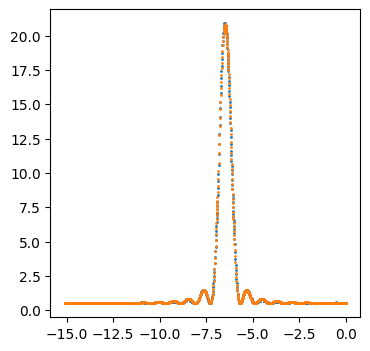

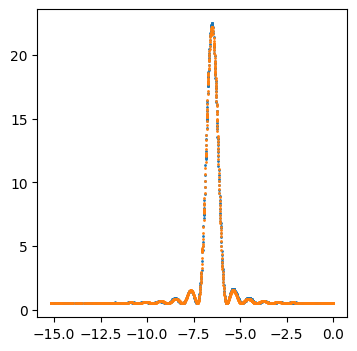

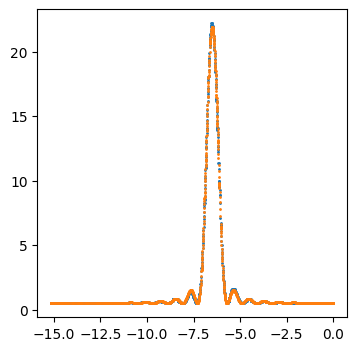

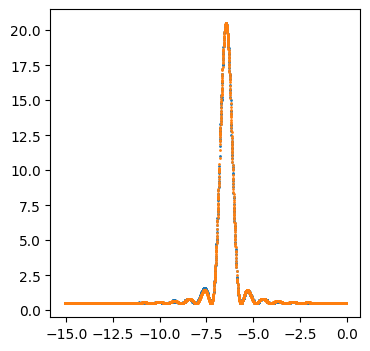

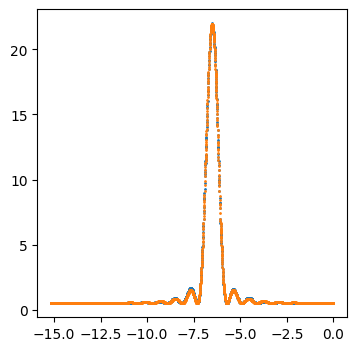

distance based on curve fit [98.23967149886313, 97.44701338891082, 97.99073029980939, 98.18022152644373, 98.1513659432111]


In [10]:
slit_width = 0.08E-3
wavelength = 650E-9

def curve(position, I_0, displace, distance):
    beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
    return I_0 * (np.sin(beta)/beta)**2 + 0.5


distance_list = []

for i in range(1,6):
    position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
    position = position[~np.isnan(position)]/10
    intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
    intensity = intensity[~np.isnan(intensity)]
    
    coeff, cov = optimize.curve_fit(curve, position, intensity, p0 = [5.6,-6.4,100])
    distance_list.append(coeff[2])
    
    plt.figure(figsize=(4,4))
    plt.scatter(position, intensity, s=1)
    plt.scatter(position, curve(position, coeff[0], coeff[1], coeff[2]),s=1)

    plt.show()
    
    if verbose:      
        print(i, x,y)
        print(intensity[300:350])

print("distance based on curve fit", distance_list)

# E4part3_a 0.04mm d 0.25mm

In [11]:
task1a = pd.read_excel("E4part3_a4d25.xlsx")
task1a.columns

Index(['Time (s) Run #1', 'Position (mm) Run #1', 'Light Intensity (%) Run #1',
       'Time (s) Run #2', 'Position (mm) Run #2', 'Light Intensity (%) Run #2',
       'Time (s) Run #3', 'Position (mm) Run #3', 'Light Intensity (%) Run #3',
       'Time (s) Run #4', 'Position (mm) Run #4', 'Light Intensity (%) Run #4',
       'Time (s) Run #5', 'Position (mm) Run #5',
       'Light Intensity (%) Run #5'],
      dtype='object')

I've commented this. Don't run it.

slit_width = 0.04E-3
d = 0.25E-3
wavelength = 650E-9

def curve(position, I_0, displace, distance):
    beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
    phi = 2*np.pi*d/wavelength *  np.sin(np.arctan((position - displace)/distance))
    return I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5


distance_list = []

for i in range(1,6):
    position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
    position = position[~np.isnan(position)]/10
    intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
    intensity = intensity[~np.isnan(intensity)]

    #position = position[7980:10700]
    #intensity = intensity[7980:10700]
    
    coeff, cov = optimize.curve_fit(curve, position, intensity, p0 = [21,-6.5,100])
    distance_list.append(coeff[2])
    
    plt.figure(figsize=(4,4))
    plt.scatter(position, intensity, s=1)
    plt.scatter(position, curve(position, coeff[0], coeff[1], coeff[2]),s=1)

    plt.show()
    
    if verbose:      
        print(i, x,y)
        print(intensity[300:350])

print("distance based on curve fit", distance_list)

Text(0.5, 1.0, 'Double Slit a=0.04mm d=0.25mm')

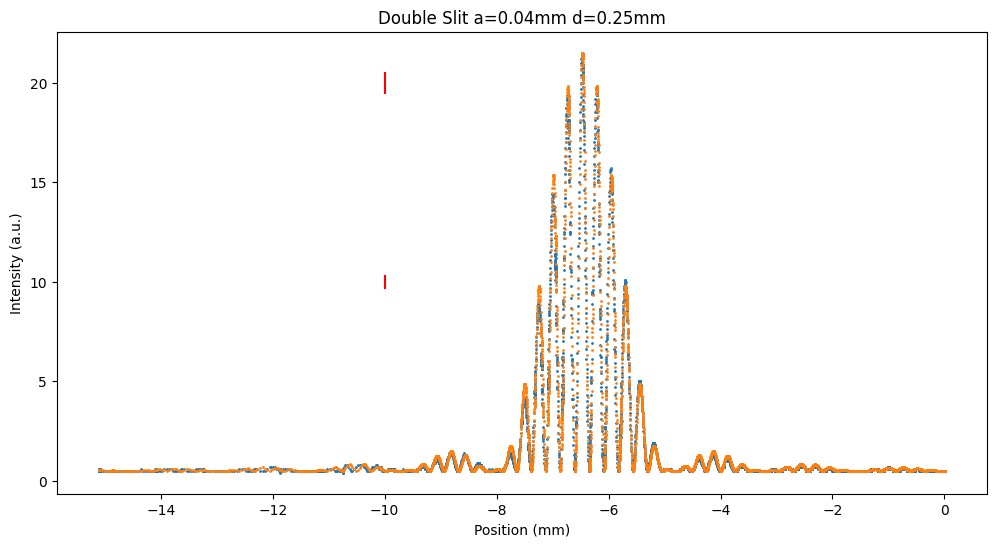

In [12]:
slit_width = 0.04E-3
d = 0.25E-3
wavelength = 650E-9

i=5

position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
position = position[~np.isnan(position)]/10
intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
intensity = intensity[~np.isnan(intensity)]

#@widgets.interact(I_0 = (0,25.0),displace = (-14.00,0), distance = (0,110))
#def plot_wave(I_0=21, displace = -6.47, distance = 100):
I_0=21
displace = -6.47
distance = 100

beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
phi = 2*np.pi*d/wavelength *  np.sin(np.arctan((position - displace)/distance))
intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5

plt.figure(figsize=(12,6))
plt.scatter(position, intensity, s=1)
plt.scatter(position, intensity_theory, s=1)

plt.plot([-10,-10],[19.5,20.5], color='red')
plt.plot([-10,-10],[9.7,10.3], color='red')
plt.xlabel('Position (mm)')
plt.ylabel('Intensity (a.u.)')
plt.title('Double Slit a=0.04mm d=0.25mm')

# E4part3_a 0.04mm d 0.50mm

In [21]:
task1a = pd.read_excel("E4part3_a4d50.xlsx")
task1a.columns

Index(['Time (s) Run #1', 'Position (mm) Run #1', 'Light Intensity (%) Run #1',
       'Time (s) Run #2', 'Position (mm) Run #2', 'Light Intensity (%) Run #2',
       'Time (s) Run #3', 'Position (mm) Run #3',
       'Light Intensity (%) Run #3'],
      dtype='object')

In [14]:
slit_width = 0.04E-3
d = 0.50E-3
wavelength = 650E-9

i=1

position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
position = position[~np.isnan(position)]/10
intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
intensity = intensity[~np.isnan(intensity)]

@widgets.interact(I_0 = (0,25.0),displace = (-14.00,0), distance = (0,110))
def plot_wave(I_0=23, displace = -6.47, distance = 100):
    beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
    phi = 2*np.pi*d/wavelength *  np.sin(np.arctan((position - displace)/distance))
    intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5
    
    plt.figure(figsize=(12,6))
    plt.scatter(position, intensity, s=1)
    plt.scatter(position, intensity_theory, s=1)

interactive(children=(FloatSlider(value=23.0, description='I_0', max=25.0), FloatSlider(value=-6.47, descripti…

/tmp/ipykernel_3715/134062470.py:20: RuntimeWarning: invalid value encountered in divide
  intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5


Text(0.5, 1.0, 'Double Slit a=0.04mm d=0.5mm')

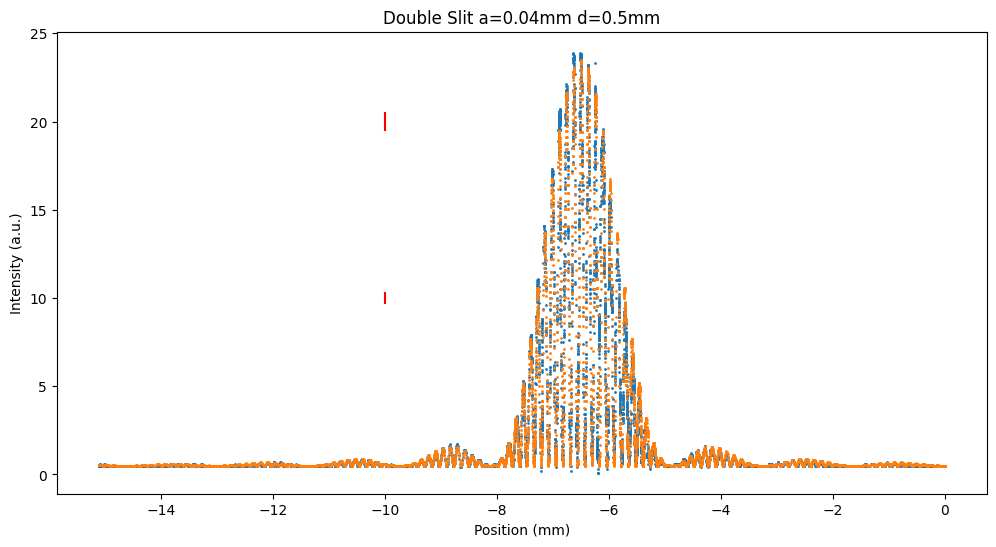

In [22]:
slit_width = 0.04E-3
d = 0.50E-3
wavelength = 650E-9

i=1

position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
position = position[~np.isnan(position)]/10
intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
intensity = intensity[~np.isnan(intensity)]

#@widgets.interact(I_0 = (0,25.0),displace = (-14.00,0), distance = (0,110))
#def plot_wave(I_0=23, displace = -6.47, distance = 100):
I_0=23
displace = -6.50
distance = 100

beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
phi = 2*np.pi*d/wavelength *  np.sin(np.arctan((position - displace)/distance))
intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5

plt.figure(figsize=(12,6))
plt.scatter(position, intensity, s=1)
plt.scatter(position, intensity_theory, s=1)
    
plt.plot([-10,-10],[19.5,20.5], color='red')
plt.plot([-10,-10],[9.7,10.3], color='red')
plt.xlabel('Position (mm)')
plt.ylabel('Intensity (a.u.)')
plt.title('Double Slit a=0.04mm d=0.5mm')

# E4part3_a 0.08mm d 0.25mm

In [16]:
task1a = pd.read_excel("E4part3_a8d25.xlsx")
task1a.columns

Index(['Time (s) Run #1', 'Position (mm) Run #1', 'Light Intensity (%) Run #1',
       'Time (s) Run #2', 'Position (mm) Run #2', 'Light Intensity (%) Run #2',
       'Time (s) Run #3', 'Position (mm) Run #3', 'Light Intensity (%) Run #3',
       'Time (s) Run #4', 'Position (mm) Run #4', 'Light Intensity (%) Run #4',
       'Time (s) Run #5', 'Position (mm) Run #5',
       'Light Intensity (%) Run #5'],
      dtype='object')

In [17]:
slit_width = 0.08E-3
d = 0.25E-3
wavelength = 650E-9

i=5

position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
position = position[~np.isnan(position)]/10
intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
intensity = intensity[~np.isnan(intensity)]

@widgets.interact(I_0 = (0,100.0),displace = (-14.005,0), distance = (0,110))
def plot_wave(I_0=97, displace = -6.555, distance = 100):
    beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
    phi = 2*np.pi*d/wavelength *  np.sin(np.arctan((position - displace)/distance))
    intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5
    
    plt.figure(figsize=(12,6))
    plt.scatter(position, intensity, s=1)
    plt.scatter(position, intensity_theory, s=1)

interactive(children=(FloatSlider(value=97.0, description='I_0'), FloatSlider(value=-6.555, description='displ…

/tmp/ipykernel_3715/1186534846.py:19: RuntimeWarning: invalid value encountered in divide
  intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5


Text(0.5, 1.0, 'Double Slit a=0.08mm d=0.25mm')

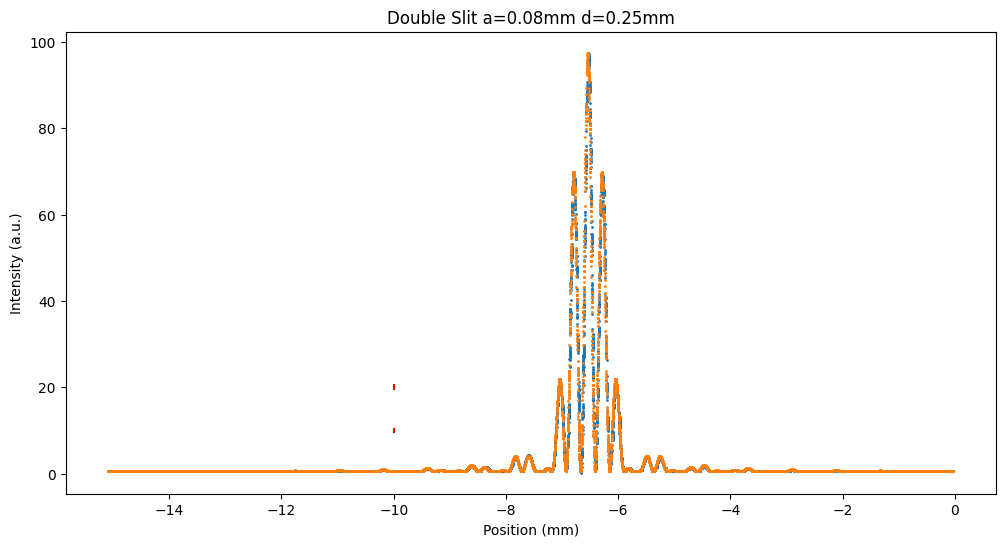

In [18]:
slit_width = 0.08E-3
d = 0.25E-3
wavelength = 650E-9

i=5

position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
position = position[~np.isnan(position)]/10
intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
intensity = intensity[~np.isnan(intensity)]

#@widgets.interact(I_0 = (0,100.0),displace = (-14.005,0), distance = (0,110))
#def plot_wave(I_0=97, displace = -6.555, distance = 100):
I_0=97
displace = -6.545
distance = 100
beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
phi = 2*np.pi*d/wavelength *  np.sin(np.arctan((position - displace)/distance))
intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5

plt.figure(figsize=(12,6))
plt.scatter(position, intensity, s=1)
plt.scatter(position, intensity_theory, s=1)

plt.plot([-10,-10],[19.5,20.5], color='red')
plt.plot([-10,-10],[9.7,10.3], color='red')
plt.xlabel('Position (mm)')
plt.ylabel('Intensity (a.u.)')
plt.title('Double Slit a=0.08mm d=0.25mm')

# E4part3_a 0.08mm d 0.5mm

In [19]:
task1a = pd.read_excel("E4part3_a8d50.xlsx")
task1a.columns

Index(['Time (s) Run #1', 'Position (mm) Run #1', 'Light Intensity (%) Run #1',
       'Time (s) Run #2', 'Position (mm) Run #2', 'Light Intensity (%) Run #2',
       'Time (s) Run #3', 'Position (mm) Run #3',
       'Light Intensity (%) Run #3'],
      dtype='object')

Text(0.5, 1.0, 'Double Slit a=0.08mm d=0.50mm')

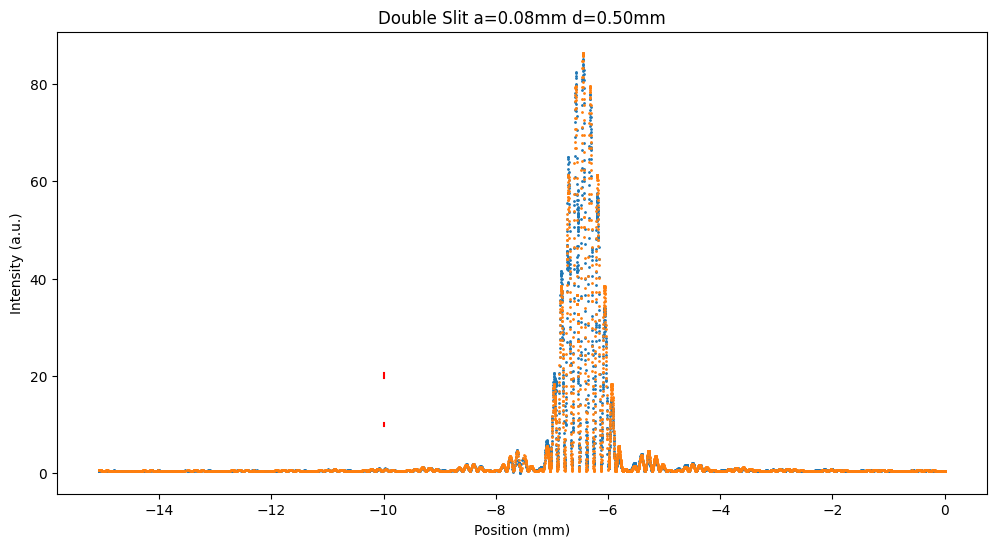

In [20]:
slit_width = 0.08E-3
d = 0.5E-3
wavelength = 650E-9

i=3

position = task1a[f'Position (mm) Run #{i}' ].to_numpy()
position = position[~np.isnan(position)]/10
intensity = task1a[f'Light Intensity (%) Run #{i}'].to_numpy()
intensity = intensity[~np.isnan(intensity)]

#@widgets.interact(I_0 = (0,100.0),displace = (-14.005,0), distance = (0,110))
#def plot_wave(I_0=97, displace = -6.555, distance = 100):
I_0=86
displace = -6.45
distance = 100
beta = np.pi*slit_width/wavelength * np.sin(np.arctan((position - displace)/distance))
phi = 2*np.pi*d/wavelength *  np.sin(np.arctan((position - displace)/distance))
intensity_theory = I_0 * (np.sin(beta)/beta)**2 * (np.cos(phi/2))**2 + 0.5

plt.figure(figsize=(12,6))
plt.scatter(position, intensity, s=1)
plt.scatter(position, intensity_theory, s=1)

plt.plot([-10,-10],[19.5,20.5], color='red')
plt.plot([-10,-10],[9.7,10.3], color='red')
plt.xlabel('Position (mm)')
plt.ylabel('Intensity (a.u.)')
plt.title('Double Slit a=0.08mm d=0.50mm')